In [2]:
import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import yfinance as yf

%matplotlib inline

In [3]:
start = "2017-04-01"
end = '2021-04-01'
tcs = yf.download('TCS.NS',start,end)
infy = yf.download('INFY.NS',start,end)
wipro = yf.download('WIPRO.NS',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
tcs.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-03,1217.500000,1217.500000,1204.099976,1205.849976,1100.262573,1196888
2017-04-05,1209.949951,1209.949951,1197.500000,1200.625000,1095.495239,2905568
2017-04-06,1200.000000,1205.000000,1196.275024,1200.025024,1094.947754,1720704
2017-04-07,1197.449951,1216.625000,1196.074951,1214.525024,1108.177979,2277012
2017-04-10,1216.000000,1224.500000,1202.500000,1211.125000,1105.075806,2543264


# 1. Exploratory Analysis

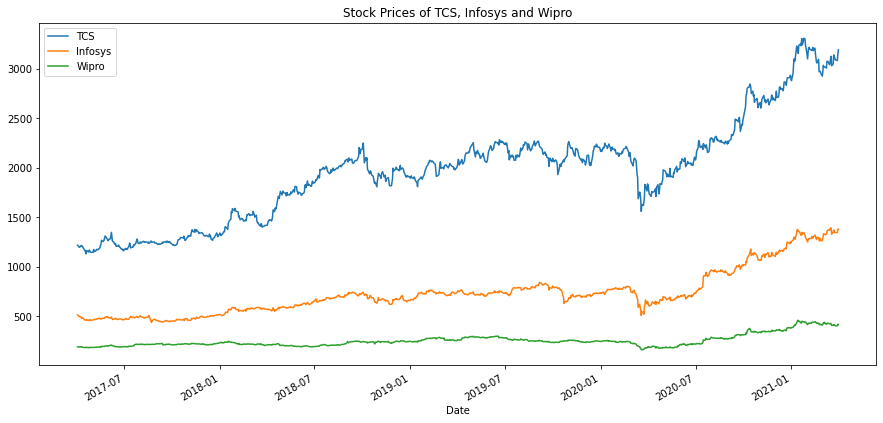

In [5]:
#Open Price
tcs['Open'].plot(label = 'TCS', figsize = (15,7))
infy['Open'].plot(label = "Infosys")
wipro['Open'].plot(label = 'Wipro')
plt.title('Stock Prices of TCS, Infosys and Wipro')
plt.legend()

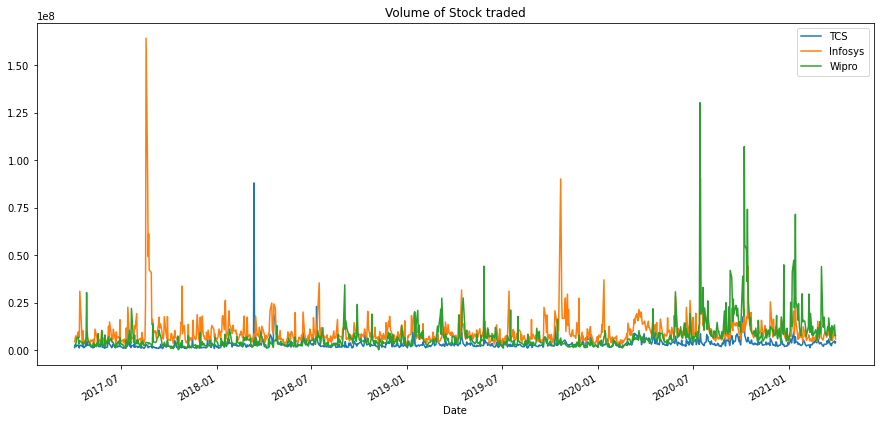

In [6]:
#Trade Volume
tcs['Volume'].plot(label = 'TCS', figsize = (15,7))
infy['Volume'].plot(label = "Infosys")
wipro['Volume'].plot(label = 'Wipro')
plt.title('Volume of Stock traded')
plt.legend()

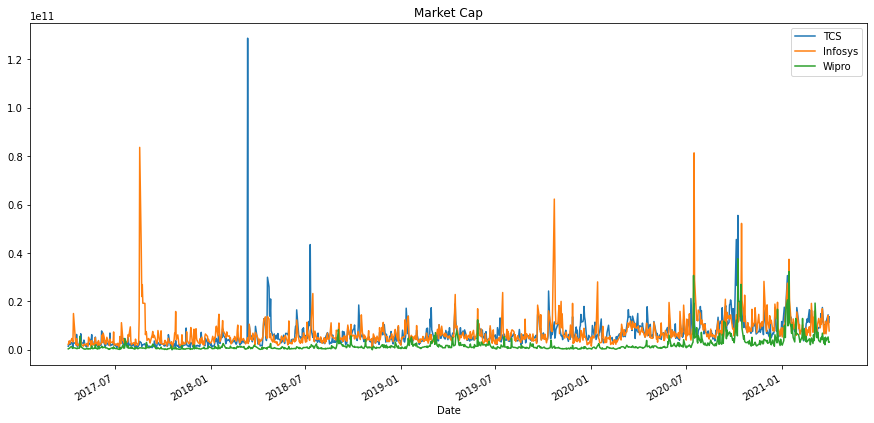

In [7]:
#Market Capitalisation
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
infy['MarktCap'] = infy['Open'] * infy['Volume']
wipro['MarktCap'] = wipro['Open'] * wipro['Volume']
tcs['MarktCap'].plot(label = 'TCS', figsize = (15,7))
infy['MarktCap'].plot(label = 'Infosys')
wipro['MarktCap'].plot(label = 'Wipro')
plt.title('Market Cap')
plt.legend()

# 2. Moving Averages

Text(0.5, 1.0, 'Moving Average - TCS')

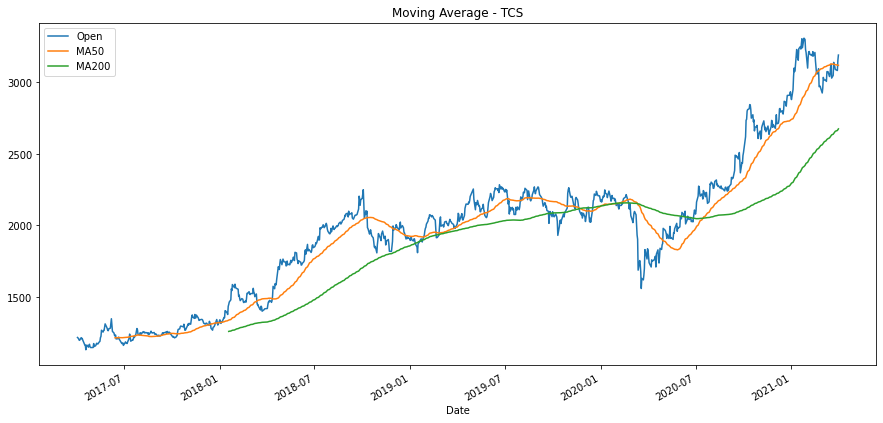

In [8]:
tcs['MA50'] = tcs['Open'].rolling(50).mean()
tcs['MA200'] = tcs['Open'].rolling(200).mean()
tcs['Open'].plot(figsize = (15,7))
tcs['MA50'].plot()
tcs['MA200'].plot()
plt.legend()
plt.title('Moving Average - TCS')

Text(0.5, 1.0, 'Moving Average - Infosys')

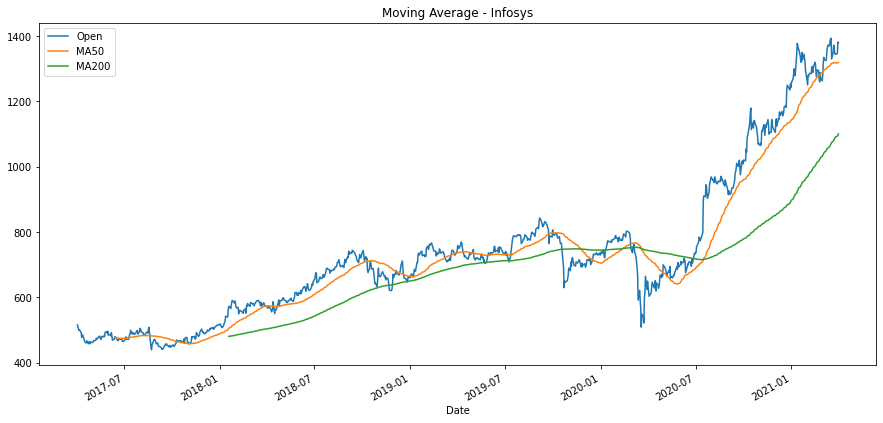

In [9]:
infy['MA50'] = infy['Open'].rolling(50).mean()
infy['MA200'] = infy['Open'].rolling(200).mean()
infy['Open'].plot(figsize = (15,7))
infy['MA50'].plot()
infy['MA200'].plot()
plt.legend()
plt.title('Moving Average - Infosys')

Text(0.5, 1.0, 'Moving Average - Wipro')

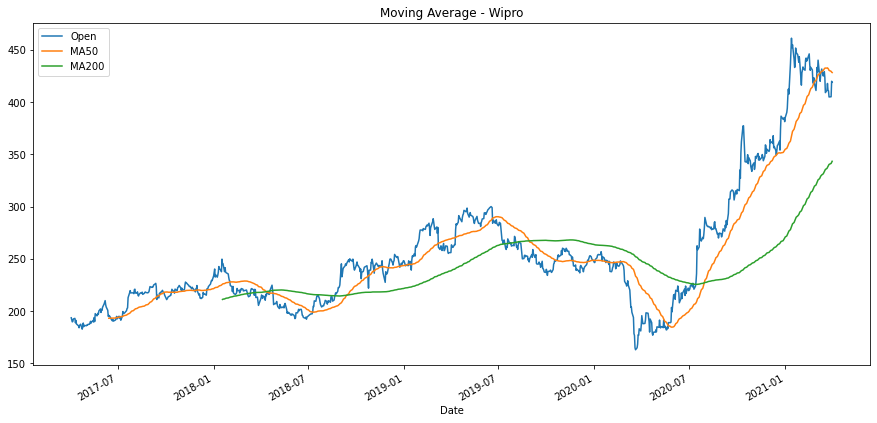

In [10]:
wipro['MA50'] = wipro['Open'].rolling(50).mean()
wipro['MA200'] = wipro['Open'].rolling(200).mean()
wipro['Open'].plot(figsize = (15,7))
wipro['MA50'].plot()
wipro['MA200'].plot()
plt.legend()
plt.title('Moving Average - Wipro')

In [11]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade pip

     |████████████████████████████████| 1.6 MB 3.7 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.3
    Uninstalling pip-21.2.3:
      Successfully uninstalled pip-21.2.3
Note: you may need to restart the kernel to use updated packages.


# 3. ARIMA

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from random import random
tcs_open = tcs['Open']
infy_open = infy['Open']
wipro_open = wipro['Open']

In [15]:
tcs_open

Date
2017-04-03    1217.500000
2017-04-05    1209.949951
2017-04-06    1200.000000
2017-04-07    1197.449951
2017-04-10    1216.000000
                 ...     
2021-03-25    3112.199951
2021-03-26    3090.649902
2021-03-30    3083.000000
2021-03-31    3155.000000
2021-04-01    3191.100098
Name: Open, Length: 986, dtype: float64

In [16]:
def predict_no(data):
    model = ARIMA(data, order=(1, 1, 1)) #p,q,d
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data), typ='levels')
    return yhat

In [17]:
#TCS
for i in range(1, 5):
    new_value = predict_no(tcs_open)
    tcs_open = tcs_open.append(new_value)
tcs_open

/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/amit.mittal/PycharmPr

2017-04-03 00:00:00    1217.500000
2017-04-05 00:00:00    1209.949951
2017-04-06 00:00:00    1200.000000
2017-04-07 00:00:00    1197.449951
2017-04-10 00:00:00    1216.000000
                          ...     
2021-04-01 00:00:00    3191.100098
986                    3189.996758
987                    3189.675090
988                    3189.581199
989                    3189.553816
Length: 990, dtype: float64

Text(0.5, 1.0, 'ARIMA Model – TCS')

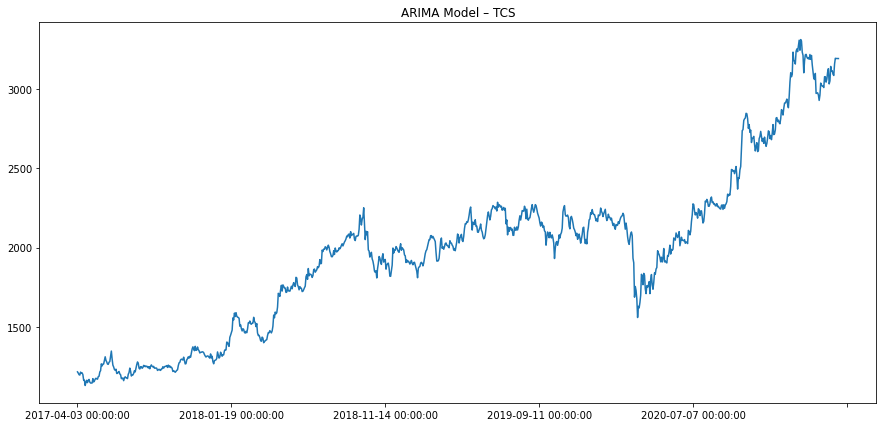

In [18]:
tcs_open.plot(label = 'TCS', figsize = (15,7))
plt.title('ARIMA Model – TCS')

In [19]:
#Infosys
for j in range(1, 5):
    new_value = predict_no(infy_open)
    infy_open = infy_open.append(new_value)
infy_open

/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/amit.mittal/PycharmPr

2017-04-03 00:00:00     516.075012
2017-04-05 00:00:00     502.500000
2017-04-06 00:00:00     499.075012
2017-04-07 00:00:00     500.450012
2017-04-10 00:00:00     492.450012
                          ...     
2021-04-01 00:00:00    1380.000000
986                    1380.735080
987                    1380.390588
988                    1380.551949
989                    1380.476344
Length: 990, dtype: float64

Text(0.5, 1.0, 'ARIMA Model – Infosys')

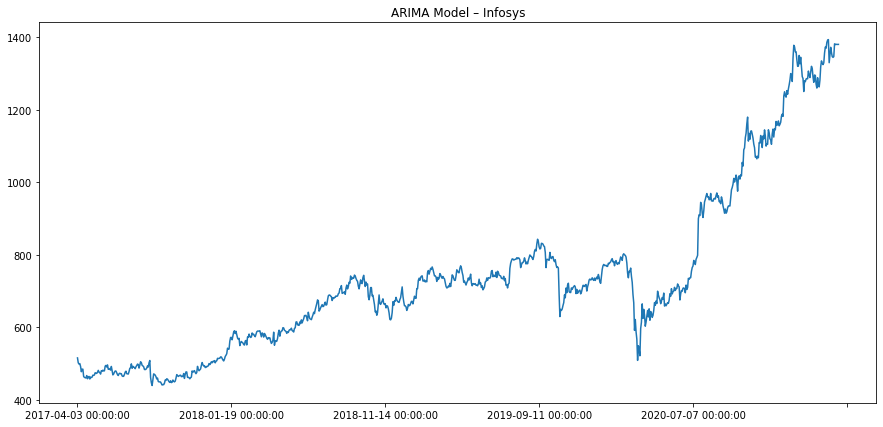

In [21]:
infy_open.plot(label = 'Infosys', figsize = (15,7))
plt.title('ARIMA Model – Infosys')

In [63]:
#Wipro
for k in range(1, 5):
    new_value = predict_no(infy_open)
wipro_open

/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/amit.mittal/PycharmProjects/pythonProject/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Pred

Date
2017-04-03    193.668793
2017-04-05    189.750046
2017-04-06    190.162552
2017-04-07    192.525055
2017-04-10    193.106293
                 ...    
2021-03-25    410.700012
2021-03-26    404.799988
2021-03-30    405.000000
2021-03-31    419.799988
2021-04-01    418.850006
Name: Open, Length: 986, dtype: float64

Text(0.5, 1.0, 'ARIMA Model – Wipro')

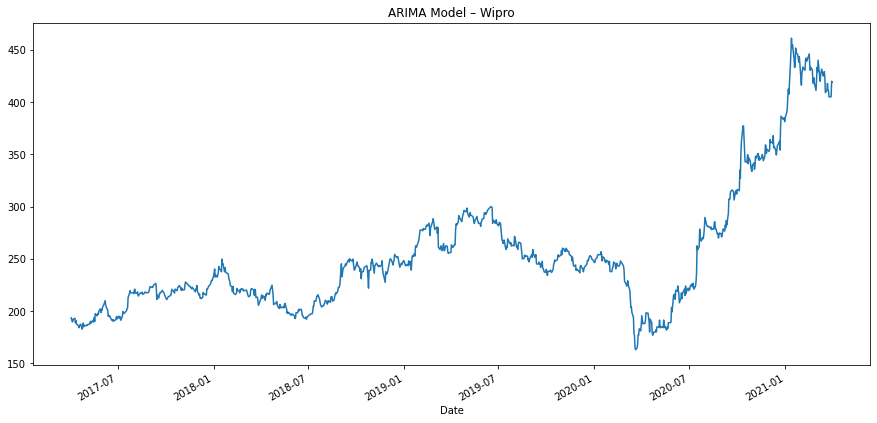

In [22]:
wipro_open.plot(label = 'Wipro', figsize = (15,7))
plt.title('ARIMA Model – Wipro')